In [150]:
# Importing required libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [153]:
# Loading data
iris = load_iris()
X = iris.data 
y = iris.target
target_names = iris.target_names
target_names
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

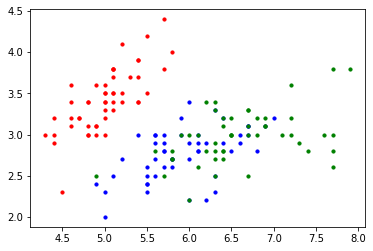

In [109]:
# Visualize the clusters

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', s=10)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', s=10)
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='green', s=10)

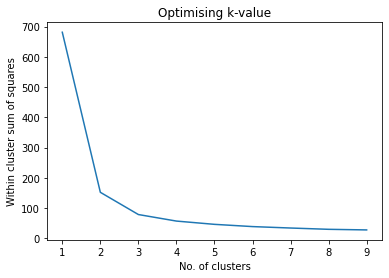

In [110]:
# Finding optimal k value (Elbow Method)

k_val = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=0)    
    kmeans.fit(X)
    k_val.append(kmeans.inertia_) # within cluster sum of squares

plt.plot(range(1,10), k_val)
plt.title("Optimising k-value")
plt.xlabel("No. of clusters")
plt.ylabel("Within cluster sum of squares")
plt.show()

In [155]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=None)

y_pred = kmeans.fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

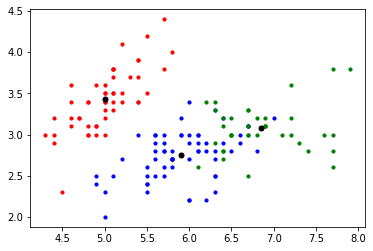

In [173]:
# Viusalize output

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='red', s=10)
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', s=10)
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], c='green', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'black', s=25)

In [119]:
accuracy_score(y, y_pred)

0.8933333333333333

[Text(0, 0.5, 'virginica'), Text(0, 1.5, 'versicolor'), Text(0, 2.5, 'setosa')]

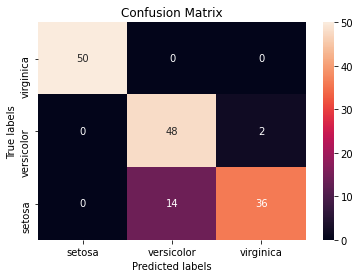

In [168]:
cm = confusion_matrix(y, y_pred, labels=[0,1,2])

ax= plt.subplot()
sns.heatmap(cm, annot=True)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax.yaxis.set_ticklabels(['virginica', 'versicolor', 'setosa'])

In [ ]:
classification_report(y, y_pred)